Dataset:
  product_name                                    review            label
0    Product A         Great product, really enjoyed it!      informative
1    Product A                 Not bad, could be better.  non-informative
2    Product B  Terrible experience, will not buy again.      informative
3    Product B               Loved it, highly recommend.      informative
4    Product C               Okay product, not the best.  non-informative

Cross-Tabulation of Product Names and Review Labels:
label         informative  non-informative
product_name                              
Product A               1                1
Product B               2                0
Product C               0                1

Classification Report:
              precision  recall  f1-score  support
0                   0.0     0.0       0.0      1.0
1                   0.0     0.0       0.0      0.0
accuracy            0.0     0.0       0.0      0.0
macro avg           0.0     0.0       0.0      1.0

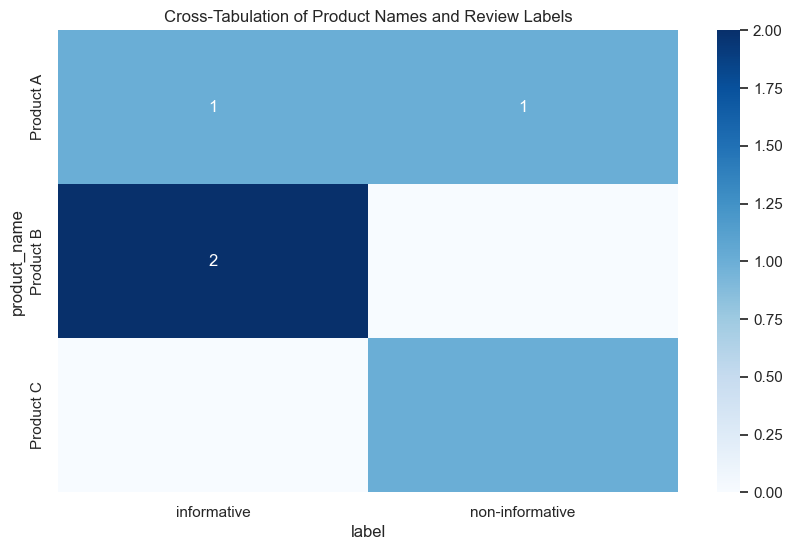

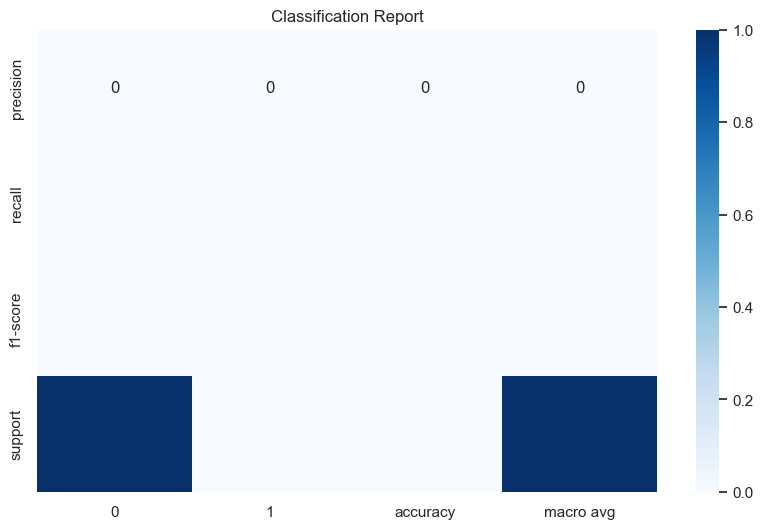

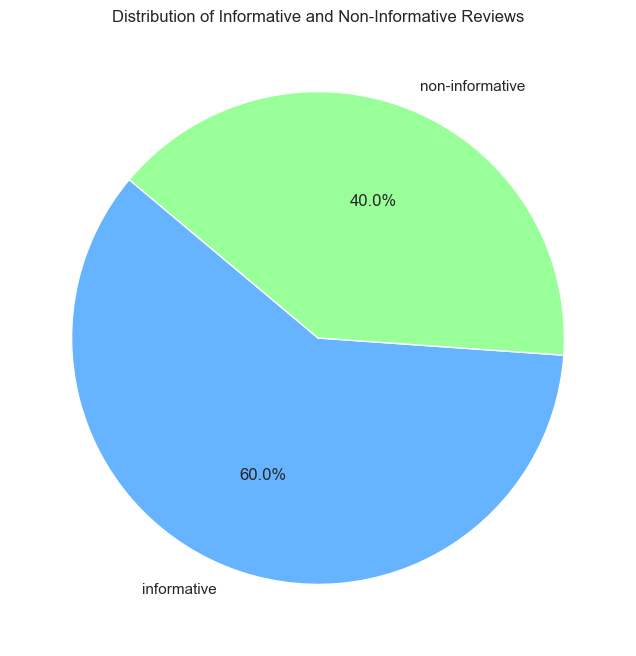

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics.pairwise import cosine_similarity

sns.set(style="whitegrid")

data = {
    'product_name': ['Product A', 'Product A', 'Product B', 'Product B', 'Product C'],
    'review': [
        'Great product, really enjoyed it!',
        'Not bad, could be better.',
        'Terrible experience, will not buy again.',
        'Loved it, highly recommend.',
        'Okay product, not the best.'
    ],
    'label': ['informative', 'non-informative', 'informative', 'informative', 'non-informative']
}

df = pd.DataFrame(data)

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['review'])
y = df['label'].apply(lambda x: 1 if x == 'informative' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
cross_tab = pd.crosstab(df['product_name'], df['label'])
accuracy = accuracy_score(y_test, y_pred)

similarity_matrix = cosine_similarity(X)
similarity_df = pd.DataFrame(similarity_matrix, index=df.index, columns=df.index)

def rank_reviews(product_name, similarity_df, df):
    product_indices = df[df['product_name'] == product_name].index
    product_similarity = similarity_df.loc[product_indices, product_indices]
    ranked_reviews = product_similarity.mean(axis=1).sort_values(ascending=False)
    return df.loc[ranked_reviews.index]

ranked_reviews_A = rank_reviews('Product A', similarity_df, df)
ranked_reviews_B = rank_reviews('Product B', similarity_df, df)
ranked_reviews_C = rank_reviews('Product C', similarity_df, df)

print("Dataset:")
print(df)

print("\nCross-Tabulation of Product Names and Review Labels:")
print(cross_tab)

print("\nClassification Report:")
print(pd.DataFrame(report).transpose())

print("\nAccuracy Score:")
print(accuracy)

print("\nPairwise Review Ranking for Product A:")
print(ranked_reviews_A)

print("\nPairwise Review Ranking for Product B:")
print(ranked_reviews_B)

print("\nPairwise Review Ranking for Product C:")
print(ranked_reviews_C)

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Cross-Tabulation of Product Names and Review Labels')
plt.show()

report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

label_counts = df['label'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99'])
plt.title('Distribution of Informative and Non-Informative Reviews')
plt.show()
